# ML - Fall 2023 - Practical Homework

## Practical Homework 6 - KMeans and PCA

Student Name: Niki Sepasian

Student Number: 400105003

# Phase 0: Introduction

**In this assignment, you will develop K-means and PCA algorithm to perform data segmentation. The dataset contains behavioral variables of customers such as Balance, Purchases, etc. Your task is to make a model to segment the same customers into the clusters.**

In [1]:
# essential packages 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

# add any other packages that you may need here

In [2]:
!wget -O https://www.dropbox.com/scl/fi/vcejtazdshv8dnhbnfxc7/dataset.csv?rlkey=zauavuzjf5jzmdoqtorkmrkzk&dl=1

# Phase 1: Explore

## Sec 1: Load and Explore the given dataset (P1-Sec1: 25 Points)

Load the dataset and display the first 10 rows of dataset. **(P1-1-1: 2 points)**

In [3]:
df= pd.read_csv("/kaggle/input/market-segmentation-in-insurance-unsupervised/Customer Data.csv")
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Print the column names and number of data samples. **(P1-1-2: 1 points)**

In [4]:
print("number of samples:",df.shape[0])
print(df.columns)

number of samples: 8950
Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


Identify the columns that contain nan values. **(P1-1-3: 2 points)**

In [5]:
cols_with_nan= df.columns[df.isna().any()].tolist()
cols_with_nan

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

Fill the nan values with the median of each column. **(P1-1-4: 2 points)**

In [6]:
for col in cols_with_nan:
    df[col]= df[col].fillna(df[col].median())

Find the max, min, and average of each column with numerical data. **(P1-1-5: 2 points)**

In [7]:
values= []
for col in df.select_dtypes(include='number').columns:
    values.append([col,df[col].min(), df[col].mean(), df[col].max() ])
pd.DataFrame(values, columns=('Column', 'Min', 'Average', 'Max'))

,Column,Min,Average,Max
0,BALANCE,0.000000,1564.474828,19043.13856
1,BALANCE_FREQUENCY,0.000000,0.877271,1.00000
2,PURCHASES,0.000000,1003.204834,49039.57000
3,ONEOFF_PURCHASES,0.000000,592.437371,40761.25000
4,INSTALLMENTS_PURCHASES,0.000000,411.067645,22500.00000
5,CASH_ADVANCE,0.000000,978.871112,47137.21176
6,PURCHASES_FREQUENCY,0.000000,0.490351,1.00000
7,ONEOFF_PURCHASES_FREQUENCY,0.000000,0.202458,1.00000
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.000000,0.364437,1.00000
9,CASH_ADVANCE_FREQUENCY,0.000000,0.135144,1.50000


Plot the Histogram of each column with numerical data. Also, show the median and average value of each column in plot. **(P1-1-6: 6 points)**

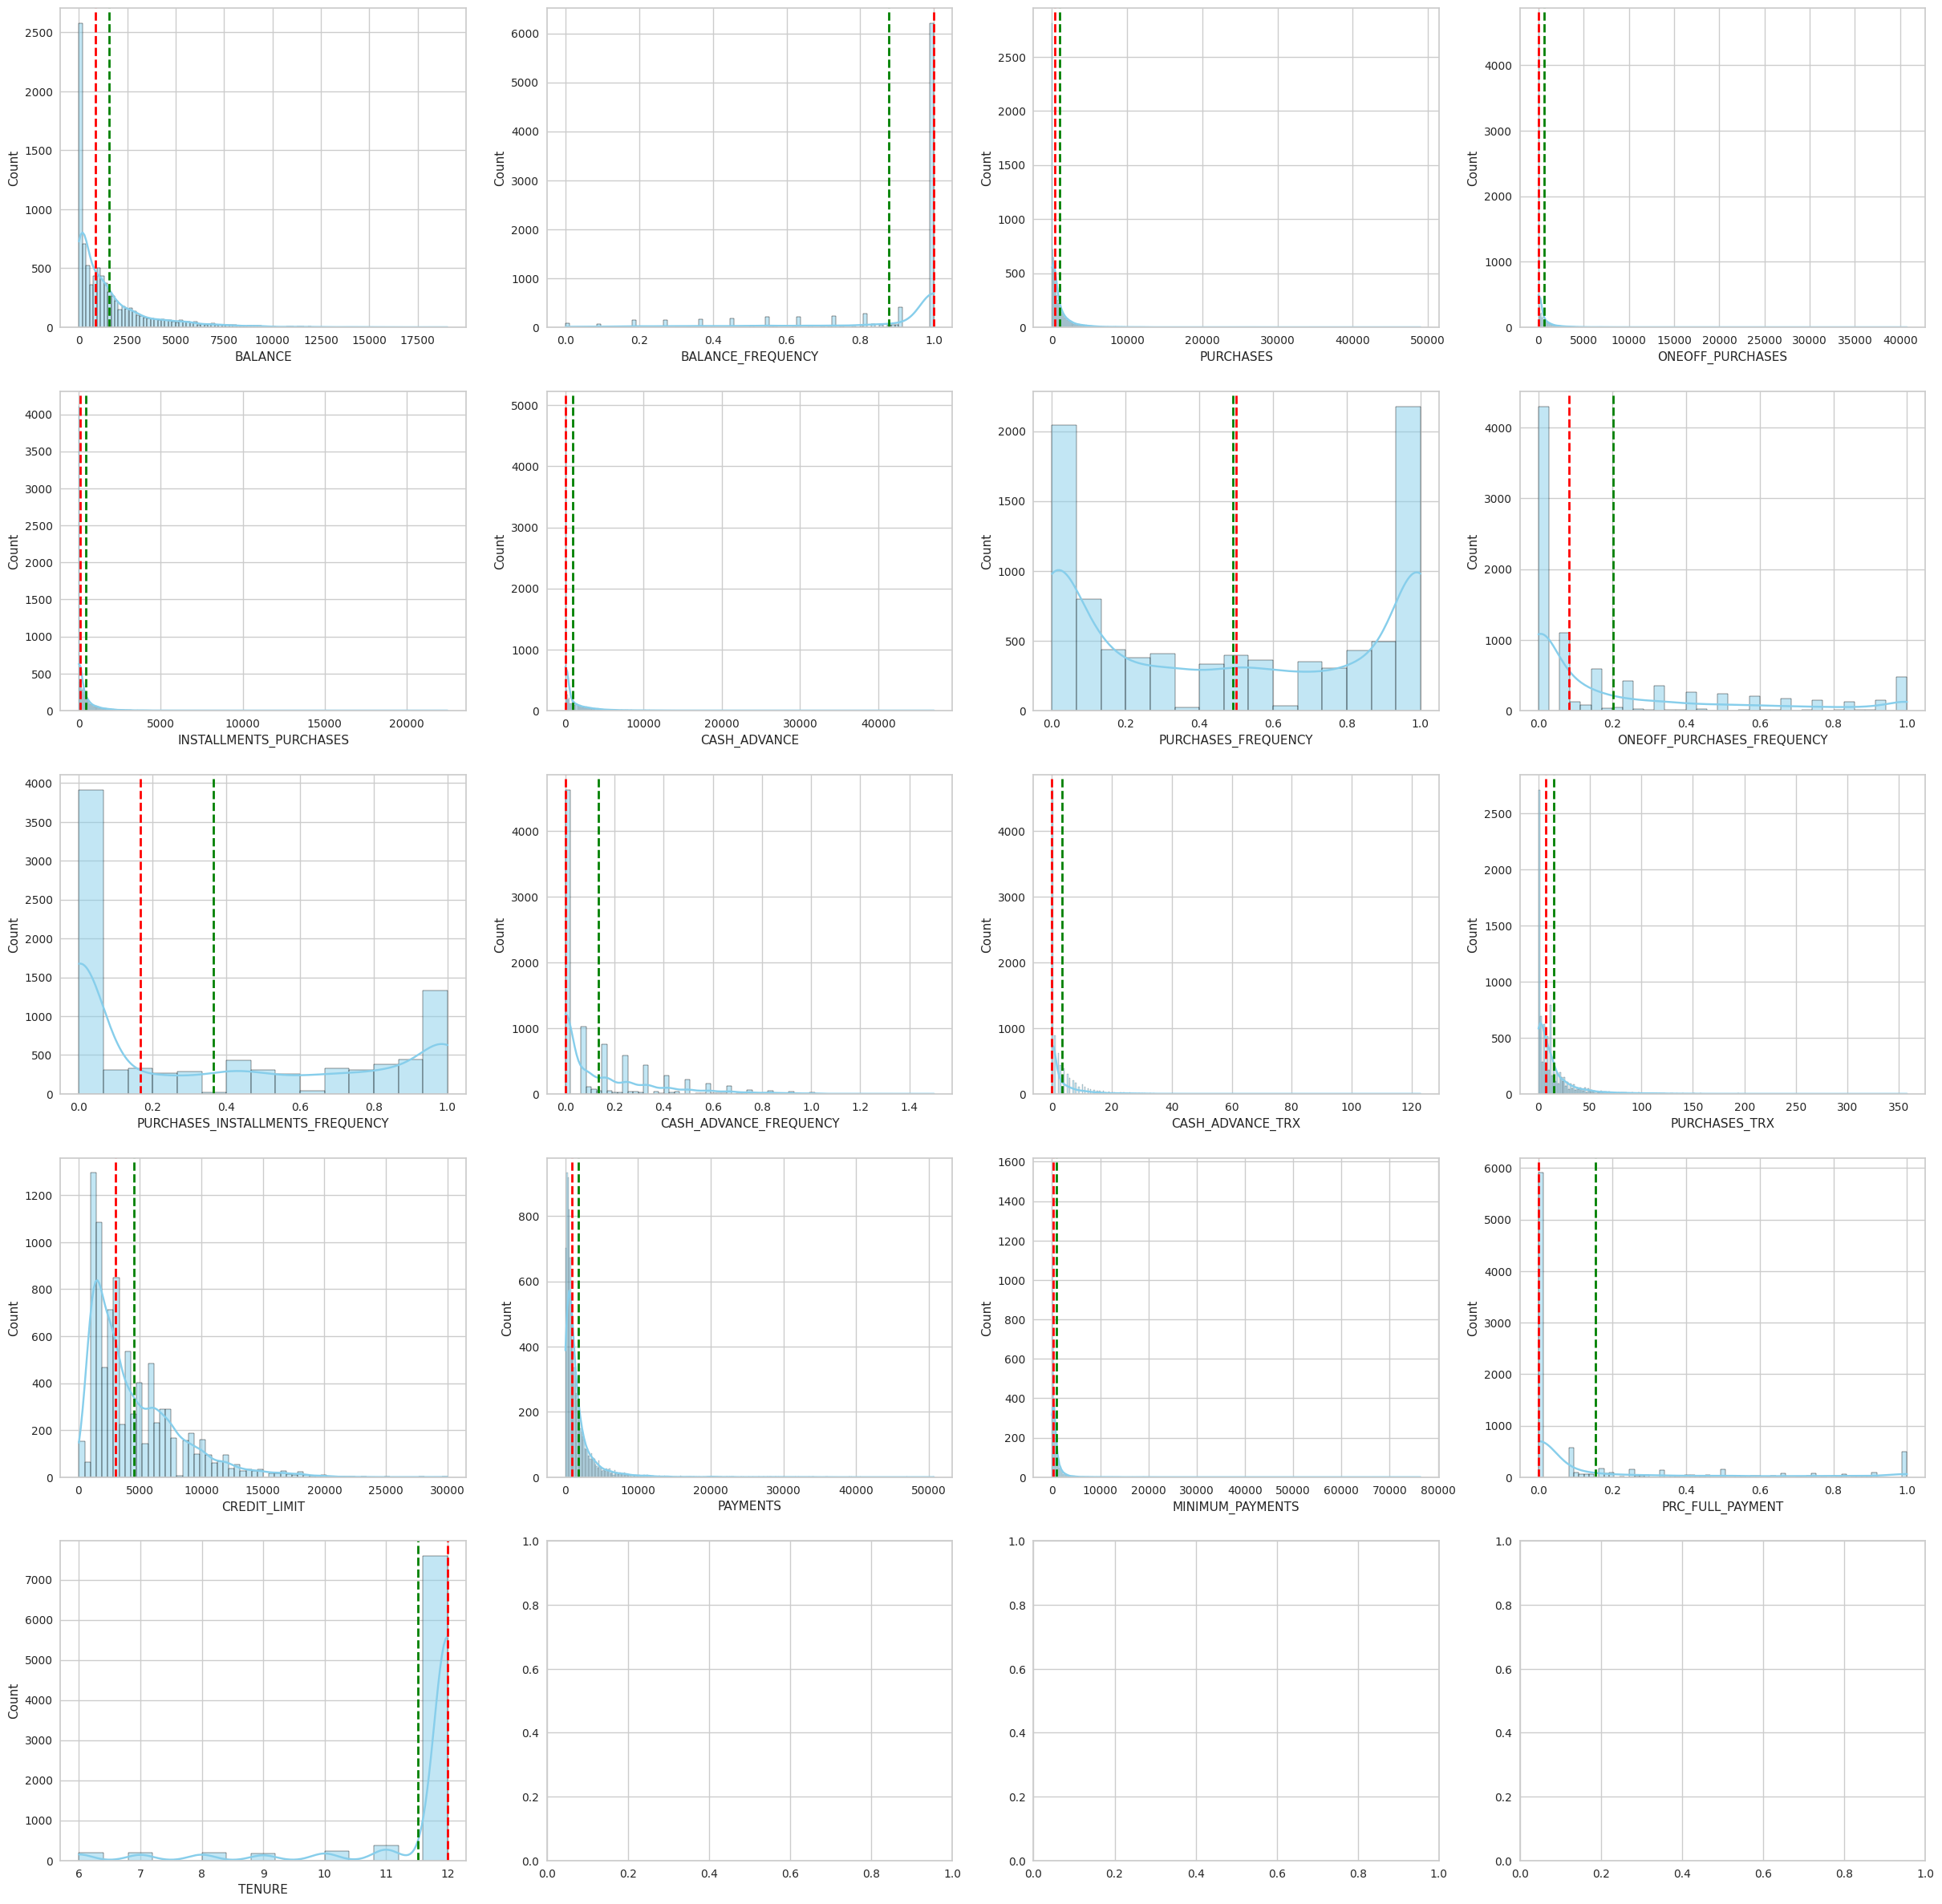

In [8]:
cols= df.select_dtypes(include='number').columns

fig,axs= plt.subplots(5, 4, figsize=(30, 30))
count= 0
for i in range(4):
    for j in range(4):
        ax= axs[i][j]
        c= cols[count]
        sns.histplot(df, x= c, kde=True, color="skyblue", ax= ax)
        ax.axvline(df[c].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
        ax.axvline(df[c].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean')
        count+= 1
ax= axs[4][0]
c= cols[count]
sns.histplot(df, x= c, kde=True, color="skyblue", ax= ax)
ax.axvline(df[c].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
ax.axvline(df[c].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean')

Display the box plot for each numerical column. **(P1-1-7: 5 points)**

<Axes: xlabel='TENURE'>

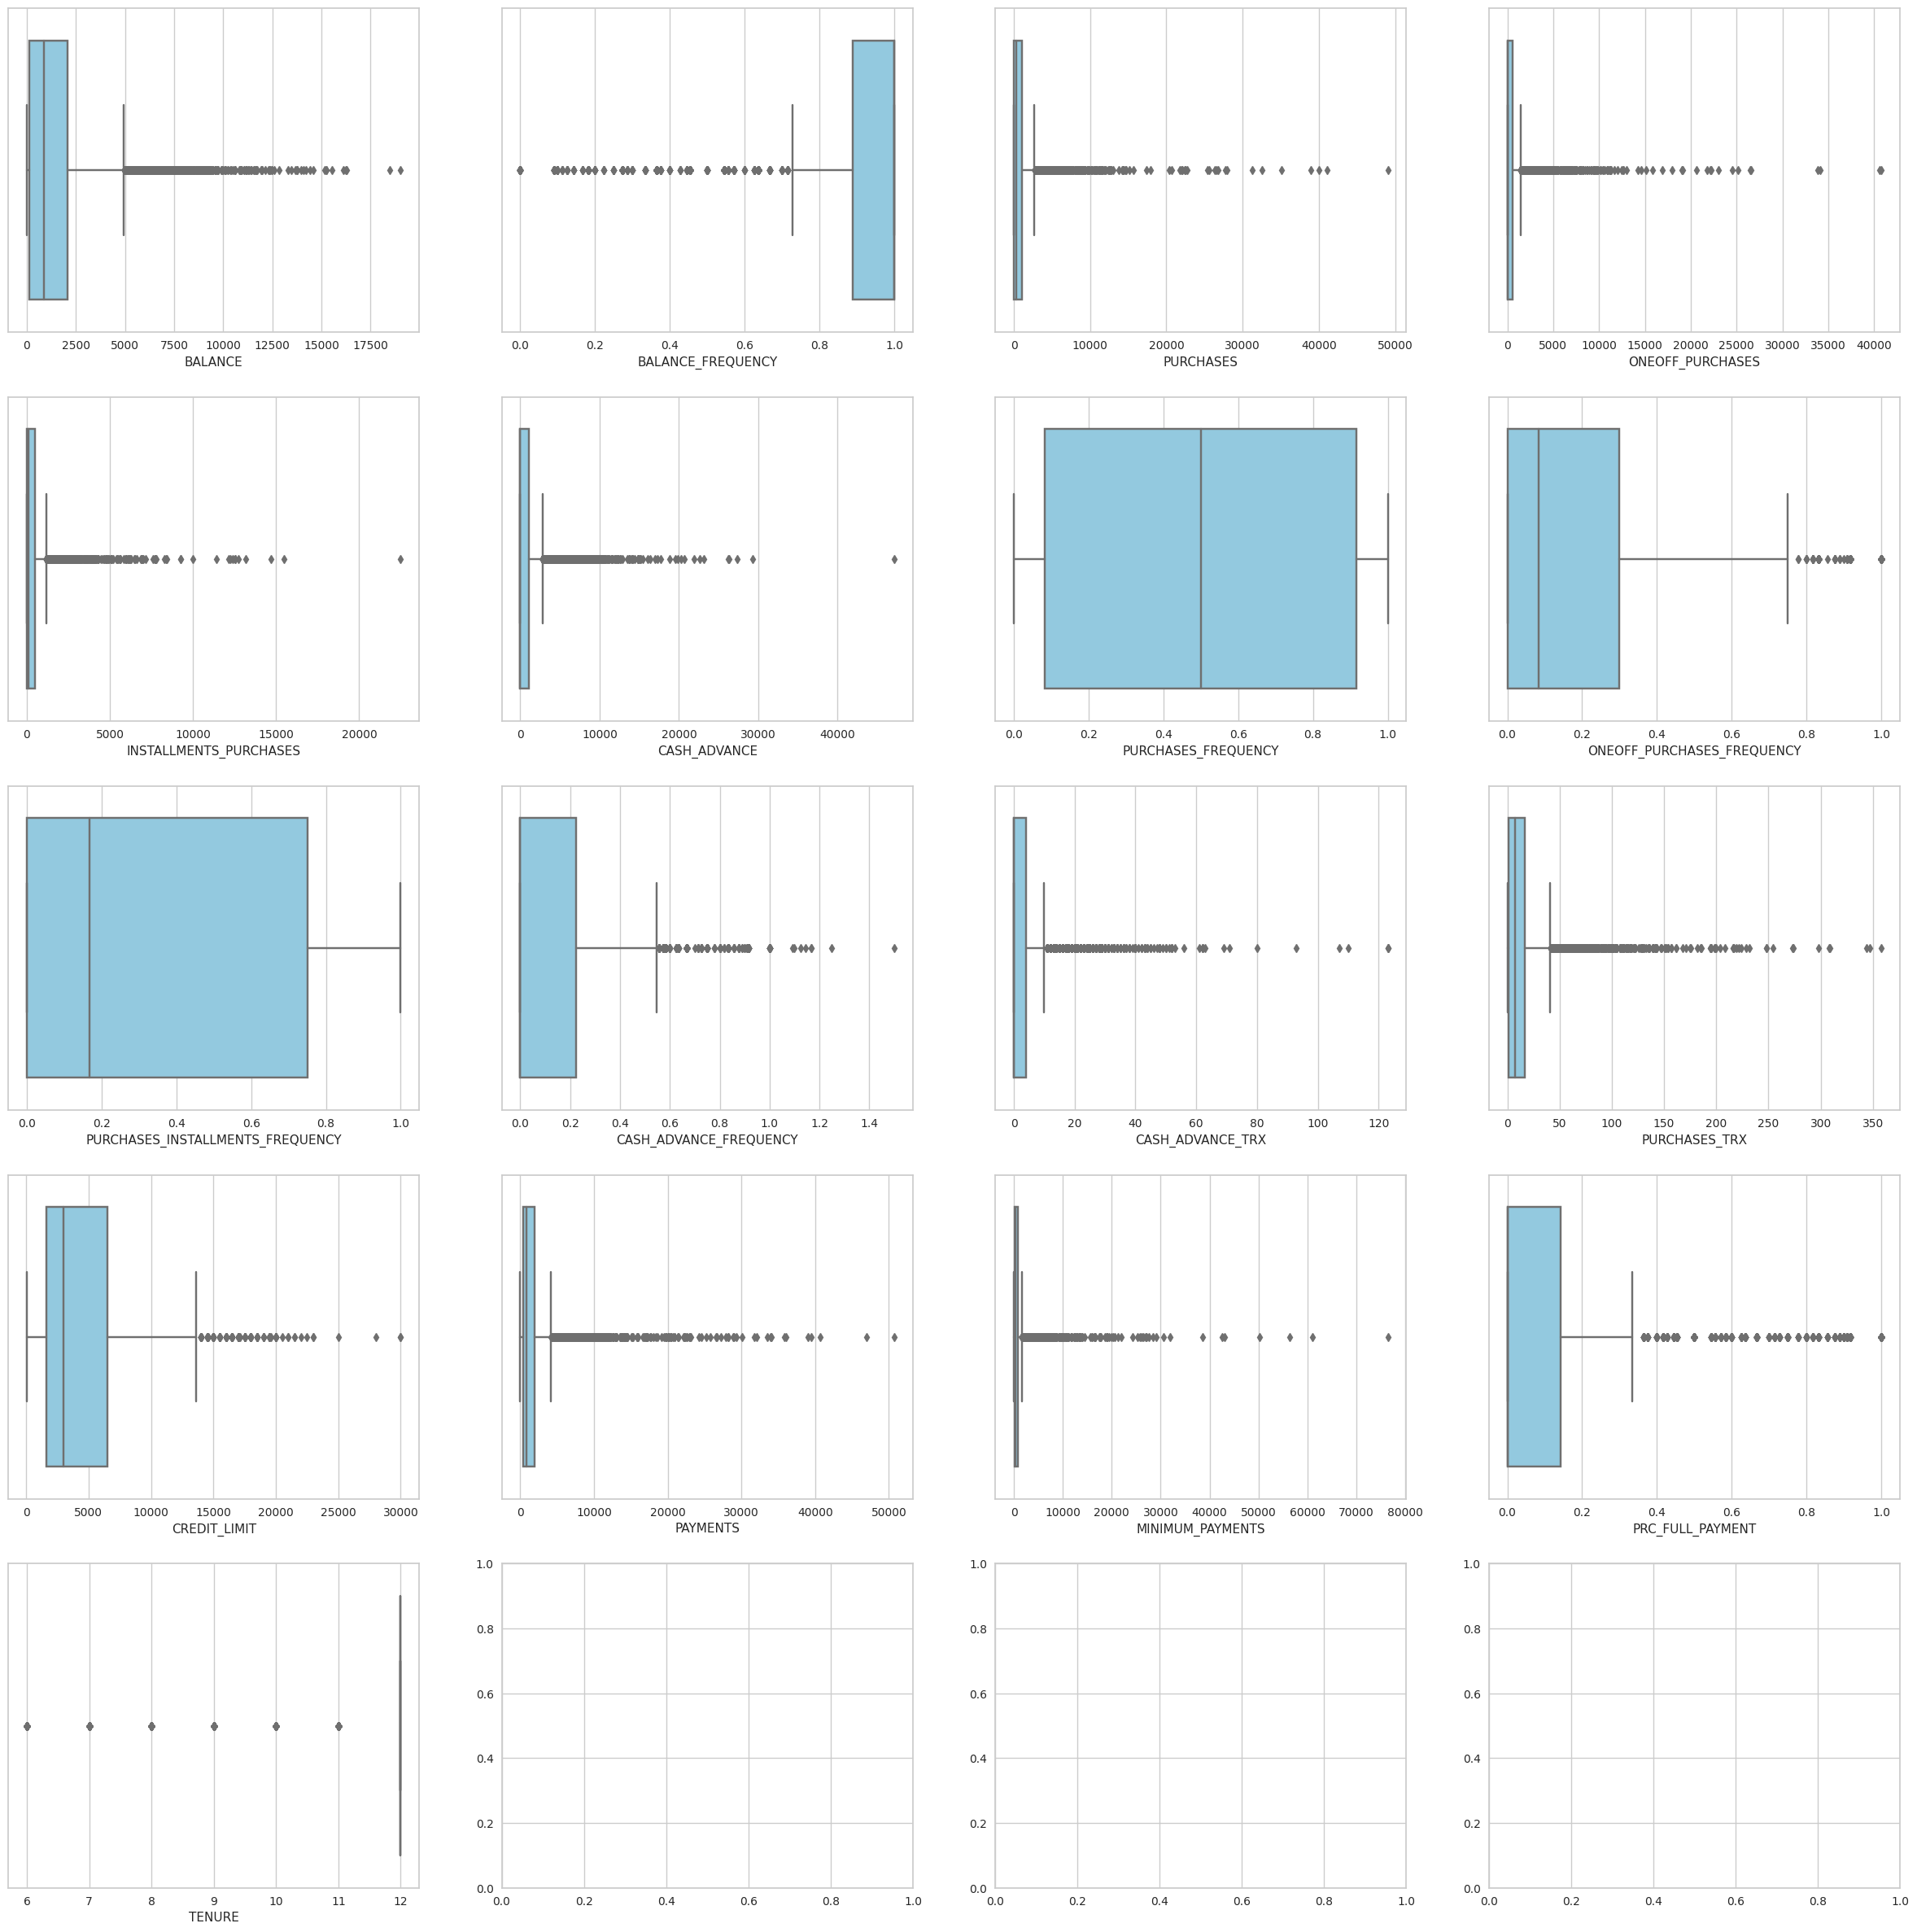

In [9]:
fig,axs= plt.subplots(5, 4, figsize=(30, 30))
count= 0
for i in range(4):
    for j in range(4):
        sns.boxplot(x= df[cols[count]], ax= axs[i][j], color="skyblue")
        count+= 1
sns.boxplot(x= df[cols[count]], ax= axs[4][0], color= "skyblue")

Show the correlation between columns by plotting the heatmap of correlation coefficients. **(P1-1-8: 5 points)**

<Axes: >

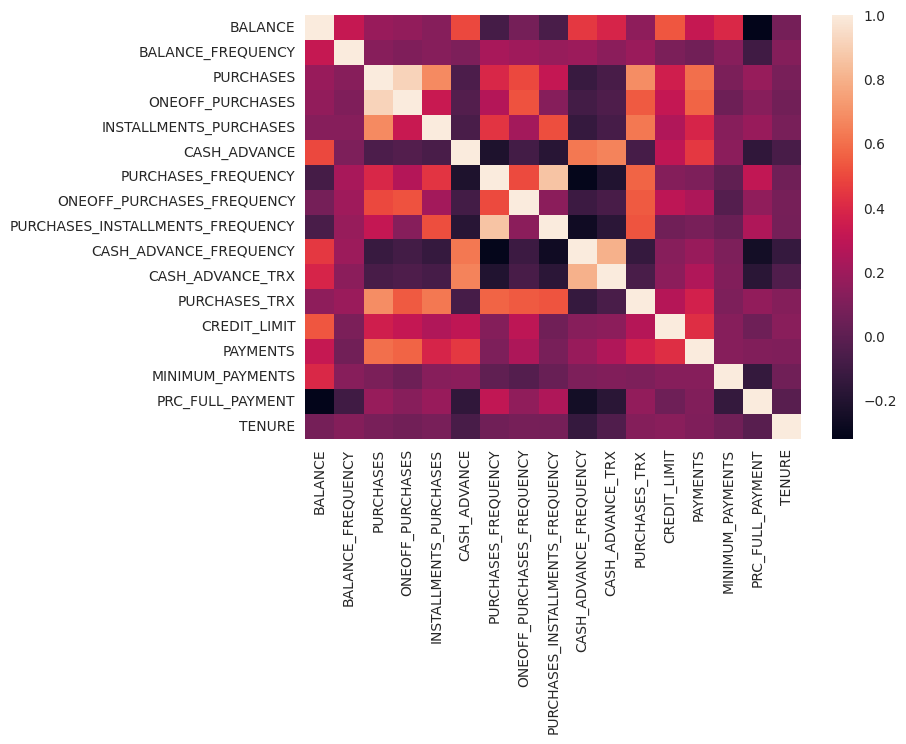

In [10]:
sns.heatmap(df.select_dtypes(include='number').corr())

# Phase 2: Preprocessing

## Sec 1: Preprocess the data **(P2-Sec1: 15 Points)**

drop the 'CUST_ID' column. **(P2-1-1: 2 points)**

In [11]:
df= df.drop('CUST_ID', axis= 1)
df.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Check for duplicated rows. If there is any duplicated row, remove them. **(P2-1-2: 6 points)**

In [12]:
df= df.drop_duplicates()

Normalize the values of each column. **(P2-1-3: 7 points)**

In [13]:
from sklearn.preprocessing import StandardScaler

# normalized_df= (df-df.min())/(df.max()-df.min())
normalized_df= pd.DataFrame(StandardScaler().fit_transform(df), columns= df.columns)
normalized_df.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


# Phase 3: Modeling

## Sec 1: PCA and K-means with sklearn **(P3-Sec1: 40 Points)**

Use the `PCA` class from the `sklearn` library to reduce the dimensionality of the DataFrame. **(P3-1-1: 2 points)**

Follow [this link](https://www.youtube.com/watch?v=nEvKduLXFvk) to understand more about PCA (2 minutes).

In [14]:
from sklearn.decomposition import PCA

pca= PCA(n_components= 12)
pca_df= pd.DataFrame(pca.fit_transform(normalized_df))
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.683649,-1.072241,0.475660,0.679928,0.043195,0.068069,0.822155,-0.018952,0.118336,-0.078196,-0.235948,-0.052497
1,-1.134085,2.509150,0.602216,-0.109542,0.662638,-1.102255,-0.384282,0.176154,0.674472,-0.777929,-0.870746,-0.607171
2,0.969395,-0.383577,0.090970,1.238359,-2.166584,-0.320185,-1.542496,-0.229364,-0.867803,-0.001744,-0.762170,0.683870
3,-0.888220,0.004648,1.499800,1.075271,0.225828,-0.171540,-0.236644,-0.690410,-0.064245,0.393690,0.747670,0.119186
4,-1.600021,-0.683795,0.347927,1.013642,-0.453816,0.077004,0.698278,0.245311,0.578032,-0.122073,-0.455167,-0.108719


**Elbow Method Visualization** helps to determine the optimal number of clusters by visualizing the within-cluster sum of squares (WCSS) against the number of clusters.

Use the `plot_elbow_method function` to plot the number of clusters versus WCSS for both the main DataFrame and the one reduced using `PCA`. Then Discuss the choice of the number of components for PCA and clusters for K-means. **(P3-1-2: 10 points)**

In [15]:
def plot_elbow_method(X, ax, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    ax.plot(range(1, max_clusters + 1), wcss)
    ax.set_title('Elbow Method')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('WCSS')

In [16]:
main_pca= PCA()
main_pca_df= pd.DataFrame(main_pca.fit_transform(normalized_df))

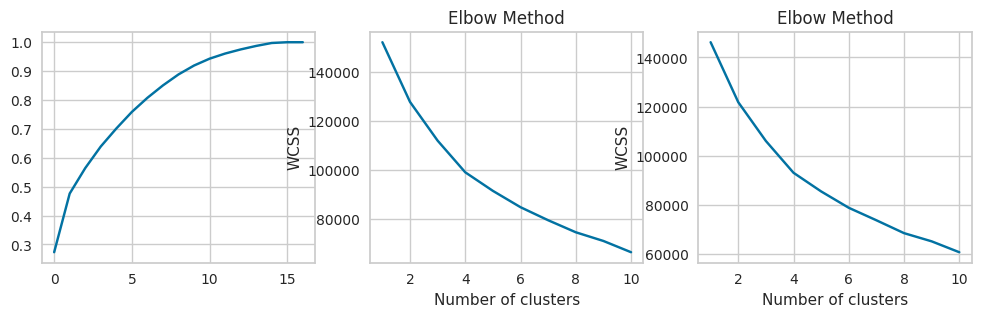

In [27]:
fig,axs= plt.subplots(1, 3, figsize=(12, 3))
axs[0].plot(np.cumsum(main_pca.explained_variance_ratio_))
plot_elbow_method(normalized_df, axs[1])
plot_elbow_method(pca_df, axs[2])
plt.show()

In [18]:
print(min(np.argwhere(np.cumsum(main_pca.explained_variance_ratio_)>0.97)))

[12]


****As it's evident in both the main and reduced dataframe's elbow plots, the elbow is visible at point 4. So we choose 4 as the number of clusters for the k-means algorithm. 
As for number of PCAs, it's not exactly efficient to try and find that number using WCSS. It may be possible to do so by drawing a WCSS plot for different numbers of PCA and comparing it with the plot for the main dataframe. But obviously in a dataframe with scales such as the one we are working with, eyeballing that difference won't be easy. So instead of doing so, we can get and plot the explained_variance_ratio variable from the traied PCA and look for a point in which the curve starts to level off. In case the visual analysis is mandatory, you can observe the said plot on the left side of diagrams above. But we could simply check for the smallest number of components in the explained_variable_ratio that is more than 97% (explains more than 97% of the original dataframe's variance.). As calculated above, the said value is 12 components that corroborates what we can see in the said diagram. ****

Use the `KMeans` class from the `sklearn.cluster` module to create clusters from the DataFrame that has been dimensionally reduced using `PCA`. **(P3-1-3: 3 points)**

Follow [this link](https://www.youtube.com/watch?v=R2e3Ls9H_fc) to understand more about KMeans (4 minutes).

In [19]:
kmeans= KMeans(n_clusters= 4, random_state=42)
pred= kmeans.fit_predict(pca_df)
pred

array([3, 0, 2, ..., 2, 3, 3], dtype=int32)

Complete the definition of the following class to implement PCA, which is capable of reducing the dimensionality. **(P3-1-4: 10 points)**

In [20]:
class CustomPCA:
    """
    Custom implementation of PCA.
    Attributes:
    -----------
    n_components : int
        Number of principal components.
    components : ndarray
        Principal components.
    """
    def init(self, n_components):
        self.n_components = n_components
        self.components = None

    def fit(self, X):
        """
        Fit the model with X.
        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            Training data.
        """
        
        # Calculate covariance matrix
        # Find eigenvalues and eigenvectors
        eigen_val, eigen_vec= np.linalg.eig(np.cov(X, rowvar=False))

        # Sort eigenvectors based on eigenvalues
        sorted_eigen_vec= eigen_vec[:, np.argsort(eigen_val)[::-1]]

        # Store first n_components eigenvectors in self.components
        self.components= sorted_eigen_vec[:, :self.n_components]


    def transform(self, X):
        """
        Apply dimensionality reduction to X.
        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            Data to transform.
        Returns:
        --------
        X_transformed : ndarray, shape (n_samples, n_components)
            Transformed data.
        """
        # Project data
        return np.dot(X, self.components)

Complete defining the class below to implement `KMeans`, an algorithm designed for clustering. **(P3-1-5: 15 points)**

In [21]:
class CustomKMeans:
    """
    Custom implementation of K-means clustering.
    Attributes:
    -----------
    n_clusters : int
        Number of clusters.
    centroids : ndarray
        Coordinates of cluster centers.
    """
    def init(self, n_clusters):
        self.n_clusters = n_clusters
        self.centroids = None

    def fit_predict(self, X):
        """
        Compute k-means clustering.
        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            Training instances to cluster.
        Returns:
        --------
        labels : ndarray, shape (n_samples,)
            Index of the cluster each sample belongs to.
        """
        
        # Initialize centroids
        self.centroids= X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        labels= []
        
        while True:
            # Assign points to the nearest centroid
            dists= np.linalg.norm(X[:, None]-self.centroids, axis=-1)
            labels= np.argmin(dists, axis=1)

            # Recalculate the centroids
            new_centroids= []
            for i in range(self.n_clusters):
                new_centroids.append(X[labels==i].mean(axis=0))
            new_centroids= np.array(new_centroids)

            # Check for convergence
            if np.allclose(new_centroids, self.centroids):
                break

            self.centroids= new_centroids

        return labels
        

## Sec 2: Fitting implemented Kmeans **(P3-Sec2: 5 Points)**

Use your implemented `CustomPCA` to reduce the dimensionality of the DataFrame. **(P3-2-1: 3 points)**

In [22]:
pca= CustomPCA()
pca.init(10)
pca.fit(normalized_df)
pca_scratch_df= pd.DataFrame(data=pca.transform(normalized_df))
pca_scratch_df.head(5)

,0,1,2,3,4,5,6,7,8,9
0,-1.683649,-1.072241,0.475660,-0.679928,0.043195,0.068069,-0.822155,0.018952,-0.118336,0.078196
1,-1.134085,2.509150,0.602216,0.109542,0.662638,-1.102255,0.384282,-0.176154,-0.674472,0.777929
2,0.969395,-0.383577,0.090970,-1.238359,-2.166584,-0.320185,1.542496,0.229364,0.867803,0.001744
3,-0.888220,0.004648,1.499800,-1.075271,0.225828,-0.171540,0.236644,0.690410,0.064245,-0.393690
4,-1.600021,-0.683795,0.347927,-1.013642,-0.453816,0.077004,-0.698278,-0.245311,-0.578032,0.122073


Apply the `CustomKMeans` implementation you created to perform clustering on the DataFrame. **(P3-2-2: 2 points)**

In [23]:
scratch_kmeans= CustomKMeans()
scratch_kmeans.init(4)
scratch_pred= scratch_kmeans.fit_predict(pca_scratch_df.values)
scratch_pred

array([3, 2, 1, ..., 1, 3, 3])

# Phase 4: Analyzing

## Sec 1: Visualizing and Comparing **(P4-Sec1: 5 Points)**

Visualize and compare the clustering results from the sklearn library with those from your custom clustering implementation. **(P4-1-1: 5 points)**

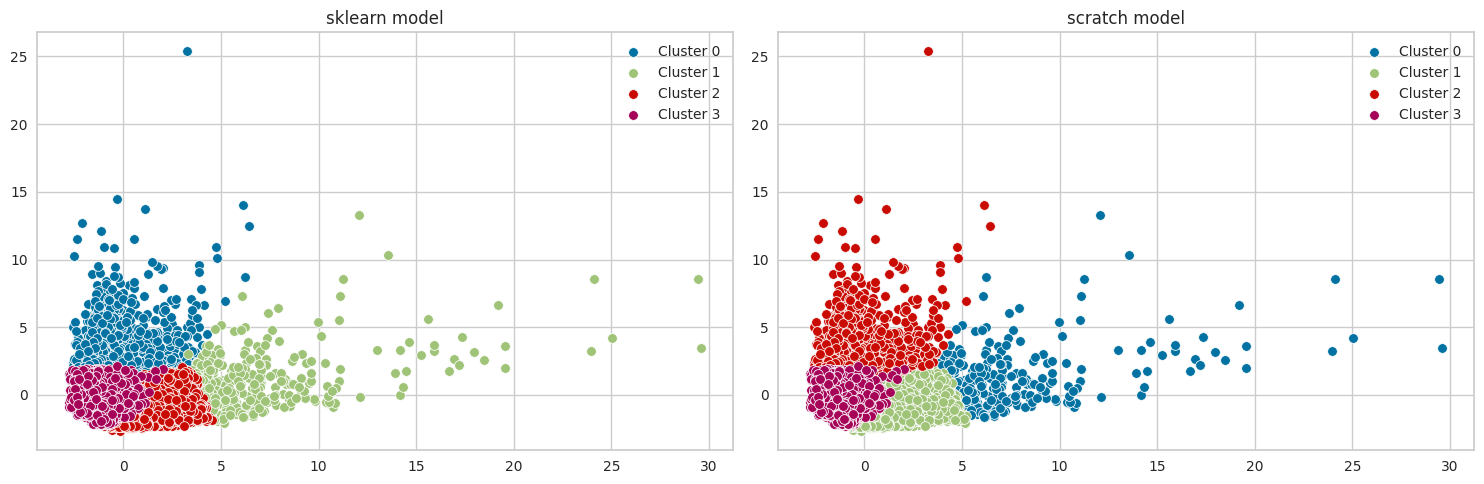

In [24]:
fig,axs= plt.subplots(1, 2, figsize=(15, 5))

x_c= pca_scratch_df.to_numpy()
for i in range(len(np.unique(scratch_pred))):
    sns.scatterplot(x= x_c[scratch_pred==i, 0], y= x_c[scratch_pred==i, 1], label=f'Cluster {i}', ax= axs[1])

axs[1].set_title('scratch model')
############################
x_s= pca_df.to_numpy()
for i in range(len(np.unique(pred))):
    sns.scatterplot(x= x_s[pred==i, 0], y= x_s[pred==i, 1], label= f'Cluster {i}', ax= axs[0])

axs[0].set_title('sklearn model')

plt.tight_layout()
plt.show()


## Sec 2: Silhouette Analysis **(P4-Sec2: 10 Points)**

**Silhouette Analysis** involves calculating and plotting the silhouette coefficients, which measure how similar each point is to its own cluster compared to other clusters. The closer these coefficients are to +1, the better the clustering.

Calculate the silhouette scores for each sample in the dataset using `silhouette_samples` and the average silhouette score using `silhouette_score`. Then, visualize these scores in a plot for each cluster for both results from the sklearn library and those from your custom clustering implementation.  **(P4-2-1: 10 points)**

In [25]:
sklearn_sample= silhouette_samples(x_s, pred)
sklearn_score= silhouette_score(x_s, pred)

scratch_sample= silhouette_samples(x_c, scratch_pred)
scratch_score= silhouette_score(x_c, scratch_pred)

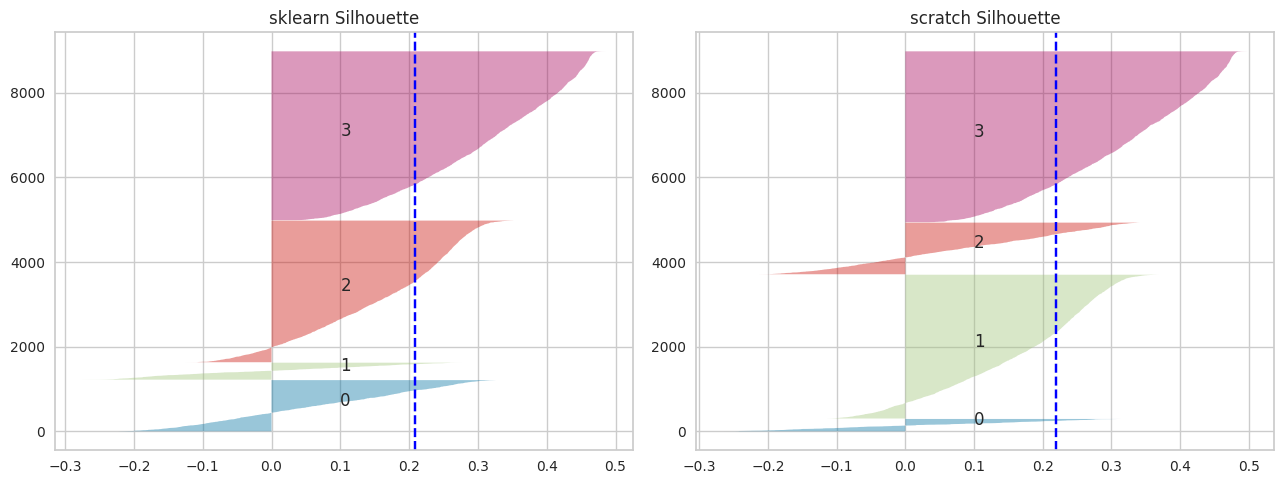

In [26]:
fig,axs= plt.subplots(1, 2, figsize=(13, 5))
text_pos= 0
for i in range(len(np.unique(pred))):
    cluster_score= np.sort(sklearn_sample[pred==i])
    axs[0].fill_betweenx(np.arange(text_pos, text_pos+cluster_score.shape[0]), 0, cluster_score, alpha=0.4)
    axs[0].text(0.1, text_pos+(cluster_score.shape[0]/2), str(i))
    text_pos+= (cluster_score.shape[0]+10)
axs[0].axvline(x=sklearn_score, color="blue", linestyle="--")
axs[0].set_title('sklearn Silhouette')
plt.tight_layout()


text_pos= 0
for i in range(len(np.unique(scratch_pred))):
    cluster_score= np.sort(scratch_sample[scratch_pred==i])
    axs[1].fill_betweenx(np.arange(text_pos, text_pos+cluster_score.shape[0]), 0, cluster_score, alpha=0.4)
    axs[1].text(0.1, text_pos+(cluster_score.shape[0]/2), str(i))
    text_pos+= (cluster_score.shape[0]+10)
axs[1].axvline(x=scratch_score, color="blue", linestyle="--")
axs[1].set_title('scratch Silhouette')
plt.tight_layout()